# Установка и импорт библиотек

In [77]:
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install scikit-learn

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re
from sklearn import preprocessing


# Обработка данных

Загружаем датафрейм и знакомимся с ним

In [79]:
df = pd.read_csv('new_dfcian.csv')
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN


Очищаем пустые строки, а также дубликаты 

In [80]:
df.dropna(how='all')
df = df.drop_duplicates(subset=['url'], keep='first')
print(df.shape)
df

(6728, 27)


,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,МИЭЛЬ,real_estate_agent,https://mytishchi.cian.ru/sale/flat/308939371/,Мытищи,sale,flat,8,14,2,69.7,...,-1,38 м²,"10,5 м²",79672094035,-1,NaN,Юбилейная,6,Медведково,Ярославский
8389,ПИК,developer,https://mytishchi.cian.ru/sale/flat/306943495/,Мытищи,sale,flat,19,25,2,48.1,...,Чистовая,"22,7 м²","16,1 м²",74951370494,"2,62 м",NaN,NaN,NaN,Ростокино,Ярославский квартал ЖК
8390,ID 47276638,homeowner,https://mytishchi.cian.ru/sale/flat/294184046/,Мытищи,sale,flat,3,5,2,45.0,...,-1,-1,6 м²,79153266030,-1,NaN,Юбилейная,11к3,Медведково,NaN
8391,EstateLiga,real_estate_agent,https://mytishchi.cian.ru/sale/flat/304572510/,Мытищи,sale,flat,3,6,2,34.0,...,-1,19 м²,8 м²,79651097781,"2,75 м",NaN,бульвар Тенистый,5,Медведково,Императорские Мытищи


In [81]:
df[['url']].describe() # Проверяем все ли значения в колонке url уникальны

,url
count,6727
unique,6727
top,https://serpukhov.cian.ru/sale/flat/301136001/
freq,1


Удаляем ненужные для анализа колонки

In [82]:
df.columns # Смотрим колонки

Index(['author', 'author_type', 'url', 'location', 'deal_type',
       'accommodation_type', 'floor', 'floors_count', 'rooms_count',
       'total_meters', 'price', 'year_of_construction', 'object_type',
       'have_loggia', 'parking_type', 'house_material_type', 'heating_type',
       'finish_type', 'living_meters', 'kitchen_meters', 'phone',
       'ceiling_height', 'district', 'street', 'house_number', 'underground',
       'residential_complex'],
      dtype='object')

In [83]:
df.drop(['author', 'author_type', 'deal_type', 'accommodation_type', 'phone', 'house_number'], axis=1, inplace=True)
print(f"Осталось {df.shape[0]} строк и {df.shape[1]} колонок")

Осталось 6728 строк и 21 колонок


Убираем NaN, а то че они расслабились 

In [84]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 6728 entries, 0 to 8392
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   6727 non-null   object
 1   location              6727 non-null   object
 2   floor                 6727 non-null   object
 3   floors_count          6727 non-null   object
 4   rooms_count           6727 non-null   object
 5   total_meters          6727 non-null   object
 6   price                 6716 non-null   object
 7   year_of_construction  6727 non-null   object
 8   object_type           6727 non-null   object
 9   have_loggia           6727 non-null   object
 10  parking_type          6727 non-null   object
 11  house_material_type   6727 non-null   object
 12  heating_type          6727 non-null   object
 13  finish_type           6727 non-null   object
 14  living_meters         6727 non-null   object
 15  kitchen_meters        6727 non-null   objec

In [85]:
df.replace('-1', np.nan, inplace=True) # Заменяем -1 (пустое значение при парсинге) на NaN

df.head(10)

,url,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,...,house_material_type,heating_type,finish_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,6,6,1,20.7,2350000,1917,Вторичка,NaN,...,NaN,NaN,NaN,18 м²,1 м²,3 м,Серпухов,Крюкова,NaN,NaN
1,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,1,9,1,33.0,4150000,1975,Вторичка,NaN,...,NaN,NaN,NaN,18 м²,6 м²,"2,7 м",NaN,Ворошилова,Аннино,NaN
2,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,4,4,1,14.0,1700000,NaN,Вторичка,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Красный Текстильщик мкр,Красный Текстильщик,NaN,NaN
3,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,5,5,1,17.5,2500000,1968,Вторичка,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Серпухов,Российская,NaN,NaN
4,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,4,7,1,25.9,3000000,2009,Вторичка,NaN,...,NaN,NaN,NaN,20 м²,5 м²,"3,5 м",Серпухов,Химиков,NaN,NaN
5,https://serpukhov.cian.ru/sale/flat/304233768/,Серпухов,2,3,1,46.7,6599999,NaN,Вторичка,NaN,...,NaN,NaN,NaN,25 м²,6 м²,NaN,Серпухов,2-я Московская,NaN,NaN
6,https://serpukhov.cian.ru/sale/flat/304697154/,Серпухов,3,5,1,29.0,3350000,1917,Вторичка,NaN,...,NaN,NaN,NaN,25 м²,NaN,3 м,Серпухов,Форсса,NaN,NaN
7,https://serpukhov.cian.ru/sale/flat/304332318/,Серпухов,3,6,1,19.1,3600000,1917,Вторичка,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Серпухов,Крюкова,NaN,NaN
8,https://serpukhov.cian.ru/sale/flat/295915722/,Серпухов,1,2,1,27.1,1900000,1969,Вторичка,NaN,...,NaN,NaN,NaN,18 м²,6 м²,"2,5 м",NaN,NaN,NaN,NaN
9,https://serpukhov.cian.ru/sale/flat/304548494/,Серпухов,6,9,2,42.7,3990000,1980,Вторичка,1 лоджия,...,NaN,NaN,NaN,"29,7 м²","5,6 м²","2,7 м",Серпухов,Весенняя,NaN,NaN


<Axes: >

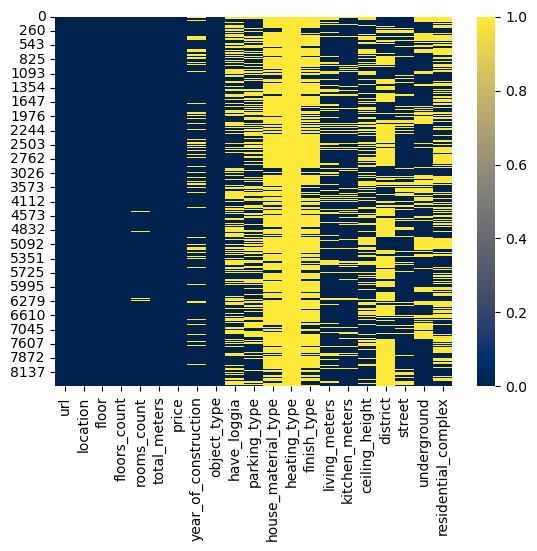

In [86]:
sns.heatmap(df.isnull(),cmap='cividis') # Смотрим на нулевые значения


Как видим, некоторые колонки пустые. Удаляем колонки с большим количеством пропусков, а также удаляем строки с пустым url, кол-вом комнат и улицей. Также заменяем пропуски в колонка с лоджией, парковкой и метро на "0" - это значит что их нет.

In [87]:
df.drop(['heating_type', 'house_material_type', 'residential_complex', 'district', 'finish_type'], axis=1,inplace=True)

df = df.dropna(subset=['url', 'rooms_count', 'street'])

df['have_loggia'] = df['have_loggia'].fillna('0')
df['parking_type'] = df['parking_type'].fillna('0')
df['underground'] = df['underground'].fillna('0')

print(f"Cтало {df.shape[1]} колонок и {df.shape[0]} строк")

Cтало 16 колонок и 5240 строк


/tmp/ipykernel_12835/688183491.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['have_loggia'] = df['have_loggia'].fillna('0')
/tmp/ipykernel_12835/688183491.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parking_type'] = df['parking_type'].fillna('0')
/tmp/ipykernel_12835/688183491.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

Заменяем пропуски в price и rooms_count на NaN и сразу удаляем их. Заодно меняем тип колонок, которые должны содержать числа

In [88]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])
df['price'] = df['price'].astype(float)
df['price'].info()

df['rooms_count'] = pd.to_numeric(df['rooms_count'], errors='coerce')
df = df.dropna(subset=['rooms_count'])
df['rooms_count'] = df['rooms_count'].astype(int)

df['floor'] = pd.to_numeric(df['floor'], errors='coerce')
df['floors_count'] = pd.to_numeric(df['floors_count'], errors='coerce')
df['total_meters'] = pd.to_numeric(df['total_meters'], errors='coerce')



<class 'pandas.core.series.Series'>
Index: 5236 entries, 0 to 8391
Series name: price
Non-Null Count  Dtype  
--------------  -----  
5236 non-null   float64
dtypes: float64(1)
memory usage: 81.8 KB


/tmp/ipykernel_12835/1426250752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = pd.to_numeric(df['price'], errors='coerce')


Делаем с year_of_construction тоже самое, что и с price. Выводим уникальные значения, чуть позже удалим выбросы

In [89]:
df['year_of_construction'] = pd.to_numeric(df['year_of_construction'], errors='coerce')
df = df.dropna(subset=['year_of_construction'])
df['year_of_construction'] = df['year_of_construction'].astype(int)
print(df['year_of_construction'].dtype) 
print(df['year_of_construction'].unique())

int64
[1917 1975 1968 2009 1980 1990 2025 2015 1970 1984 1965 2010 1964 1992
 2011 1986 1994 1969 1956 1966 1973 1971 1957 2013 1981 1972 1959 2004
 1962 2019 1978 1977 2003 1963 1952 2024 2007 1995 1976 1982 1953 2008
 2026 2023 1941 1993 2016 2027 2017 2022 1932 2012 1960 2006 1926 2020
 1943 2014 2021 1967 1904 2028 1991 2018 1987 1974 1979 1988 1930 1985
 1989 2005 1958 1996 1940 1948 1961 1938 1997 2002 2001 1999 1983 1998
 1902 2000 1915 1910 1939 1929 1954 1897 1955 1900 1949 1947 1901 1909
 1951 1936 1931 1950 1934 1928 1945 1937 1927 1896 1777 1935]


Форматируем данные (Например: 10 м² -> 10). Чтобы заполнить пропуски в некоторых столбцах медианой

In [90]:
def conversion_in_float(value):
    if isinstance(value, str):
        cleaned_value = re.sub(r'[^0-9.-]', '', value) # Используется регулярное выражение для удаления всех символов, кроме цифр, точки и минуса.
        try:
            return float(cleaned_value)
        # Если значение не является строкой, оно возвращается без изменений
        except ValueError:
            return value
    return value

# Применяем функцию ко всему датафрейму
df = df.apply(lambda x: x.apply(conversion_in_float))
df

,url,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
0,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,6,6,1,20.7,2350000.0,1917,Вторичка,0.0,Наземная,18.0,1.0,3.0,Крюкова,0.0
1,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,1,9,1,33.0,4150000.0,1975,Вторичка,0.0,0.0,18.0,6.0,27.0,Ворошилова,Аннино
3,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,5,5,1,17.5,2500000.0,1968,Вторичка,0.0,0.0,NaN,NaN,NaN,Российская,0.0
4,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,4,7,1,25.9,3000000.0,2009,Вторичка,0.0,Наземная,20.0,5.0,35.0,Химиков,0.0
6,https://serpukhov.cian.ru/sale/flat/304697154/,Серпухов,3,5,1,29.0,3350000.0,1917,Вторичка,0.0,Наземная,25.0,NaN,3.0,Форсса,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8385,https://mytishchi.cian.ru/sale/flat/306407483/,Мытищи,17,17,2,52.2,9850000.0,2013,Вторичка,1.0,Наземная,27.0,109.0,28.0,2-я Институтская,Медведково
8387,https://mytishchi.cian.ru/sale/flat/308342869/,Мытищи,2,7,2,60.0,11950000.0,2017,Вторичка,0.0,Подземная,35.0,18.0,285.0,Осташковское шоссе,Медведково
8388,https://mytishchi.cian.ru/sale/flat/308939371/,Мытищи,8,14,2,69.7,11400000.0,2018,Вторичка,0.0,0.0,38.0,105.0,NaN,Юбилейная,Медведково
8390,https://mytishchi.cian.ru/sale/flat/294184046/,Мытищи,3,5,2,45.0,7300000.0,1968,Вторичка,1.0,0.0,NaN,6.0,NaN,Юбилейная,Медведково


Далее я хочу удалить все выбросы и аномалии, потому что планирую заполнить некоторые столбцы медианой. Так что далее я ищу их и создаю боксплотики чтоб примерно понять, с какого момента выброс

In [91]:
# Ищу непонравившиеся мне столбцы с завышенными значениями
print(df['floor'].describe())
print("\n")

print(df['floors_count'].describe())
print("\n")

print(df['rooms_count'].describe())
print("\n")

print(df['total_meters'].describe())
print("\n")

print(df['price'].describe().astype(int))
print("\n")

print(df['living_meters'].describe())
print("\n")

print(df['kitchen_meters'].describe())
print("\n")

print(df['ceiling_height'].describe().astype(int))
print("\n")

count    4168.000000
mean        7.467370
std         6.521265
min         1.000000
25%         3.000000
50%         5.000000
75%        10.000000
max        82.000000
Name: floor, dtype: float64


count    4168.000000
mean       13.650432
std         8.804815
min         1.000000
25%         6.000000
50%        12.000000
75%        17.000000
max        95.000000
Name: floors_count, dtype: float64


count    4168.000000
mean        1.809261
std         0.881966
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: rooms_count, dtype: float64


count    4168.000000
mean       53.708880
std        32.759614
min        14.300000
25%        36.500000
50%        46.000000
75%        61.400000
max       590.300000
Name: total_meters, dtype: float64


count          4168
mean       15284773
std        53777233
min         1500000
25%         5600000
50%         8000000
75%        11098229
max      2361200000
Name: price, dtype: int64




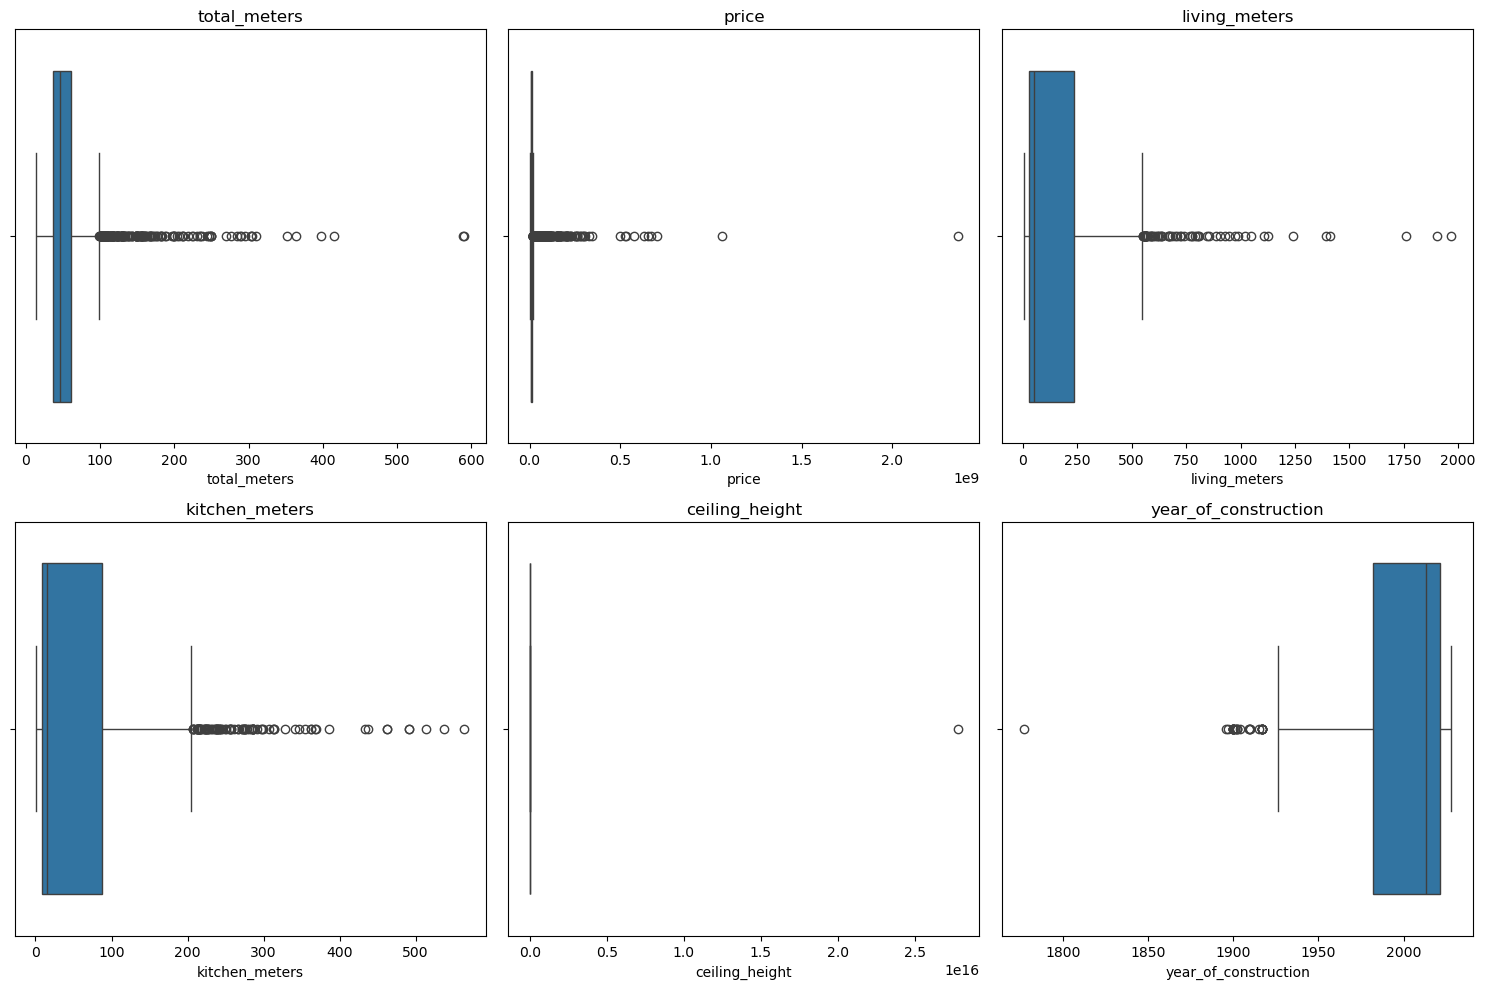

In [92]:
columnswithoutburst = df[['total_meters', 'price', 'living_meters', 'kitchen_meters', 'ceiling_height', 'year_of_construction']]
plt.figure(figsize=(15, 10))
for i, column in enumerate(columnswithoutburst, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column], orient='h')
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

In [93]:
#Удаляю всё неестественное
df = df.drop(df[(df['total_meters'] > 300)].index)
df = df.drop(df[(df['price'] > 400000000)].index)
df = df.drop(df[(df['living_meters'] > 300)].index)
df = df.drop(df[(df['kitchen_meters'] > 300)].index)
df = df.drop(df[(df['ceiling_height'] > 4)].index)
df = df.drop(df[(df['year_of_construction'] < 1950) | (df['year_of_construction'] > 2026)].index)

In [94]:
# Заполняем пропуски средним значением для каждого оставшегося столбца с пропусками
df['living_meters'].fillna(df['living_meters'].mean(), inplace=True)
df['kitchen_meters'].fillna(df['kitchen_meters'].mean(), inplace=True)
df['ceiling_height'].fillna(df['ceiling_height'].mean(), inplace=True)

/tmp/ipykernel_12835/3321648024.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['living_meters'].fillna(df['living_meters'].median(), inplace=True)
/tmp/ipykernel_12835/3321648024.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

Смотрим результат и радуемся ;)

<Axes: >

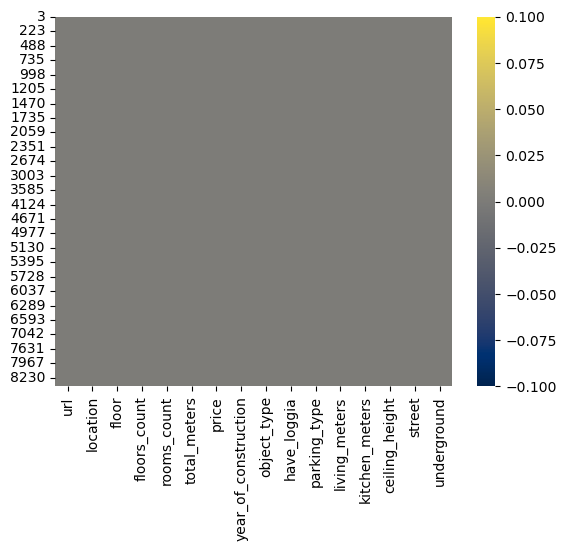

In [95]:
sns.heatmap(df.isnull(),cmap='cividis')

Победа! Но какой ценой? Ценой всего...

# Чучут🤏 кодировки и анализ от чего зависит цена за м²

In [96]:
#удаляю юрл, он не понадобился и не понадобится 
df.drop(['url'], axis=1, inplace=True)

In [97]:
# Функция, котораякодирует категориальные переменные в датафрейме числовыми значениями 
def number_encode_features(init_df):
    result = init_df.copy()  # Создаем копию датафреймв
    encoders = {}  
    
    # Список столбцов, которые нужно закодировать
    categorical_columns = [col for col in result.columns if result[col].dtype == object]
    
    for column in categorical_columns:
        result[column] = result[column].astype(str)  # Преобразуем значения в строки
        encoders[column] = preprocessing.LabelEncoder()  # Создаем кодировщик для столбца
        result[column] = encoders[column].fit_transform(result[column])  # Применяем кодировку
    
    return result, encoders  # Возвращаем закодированный датафрейм и словарь кодировщиков

# Применение функции ко всей копии датафрейма
df2, encoders = number_encode_features(df)
df2.head()

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
3,26,5,5,1,17.50,2500000.0,1968,0,0.0,0,35.0,11.0,3.0,457,0
12,26,15,17,1,20.55,2600000.0,2025,3,1.0,2,134.0,3.0,3.0,137,0
18,26,2,2,1,31.30,2700000.0,1970,0,0.0,2,35.0,5.0,3.0,217,0
19,26,5,5,1,31.00,3090000.0,1984,0,1.0,2,15.0,73.0,3.0,42,0
30,26,7,24,3,77.60,12700000.0,2011,1,1.0,0,35.0,5.0,3.0,331,0


Добавляю столбец price_per_square_meter, который соответсвенно показывает цену за кв. метр😯

In [98]:
df2['price_per_square_meter'] = df2['price'] / df2['total_meters']
df2['price_per_square_meter'] = df2['price_per_square_meter']
df2

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground,price_per_square_meter
3,26,5,5,1,17.50,2500000.0,1968,0,0.0,0,35.0,11.0,3.0,457,0,142857.142857
12,26,15,17,1,20.55,2600000.0,2025,3,1.0,2,134.0,3.0,3.0,137,0,126520.681265
18,26,2,2,1,31.30,2700000.0,1970,0,0.0,2,35.0,5.0,3.0,217,0,86261.980831
19,26,5,5,1,31.00,3090000.0,1984,0,1.0,2,15.0,73.0,3.0,42,0,99677.419355
30,26,7,24,3,77.60,12700000.0,2011,1,1.0,0,35.0,5.0,3.0,331,0,163659.793814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8376,20,7,9,2,40.50,8200000.0,1973,0,0.0,0,35.0,56.0,3.0,432,68,202469.135802
8379,20,10,17,2,50.00,9500000.0,2013,0,1.0,2,271.0,11.0,3.0,4,68,190000.000000
8381,20,9,12,2,46.00,6600000.0,1972,0,1.0,2,275.0,6.0,3.0,469,68,143478.260870
8388,20,8,14,2,69.70,11400000.0,2018,0,0.0,0,38.0,105.0,3.0,511,68,163558.106169


Строим матрицу корреляции для анализа от чего больше всего зависит цена за м²

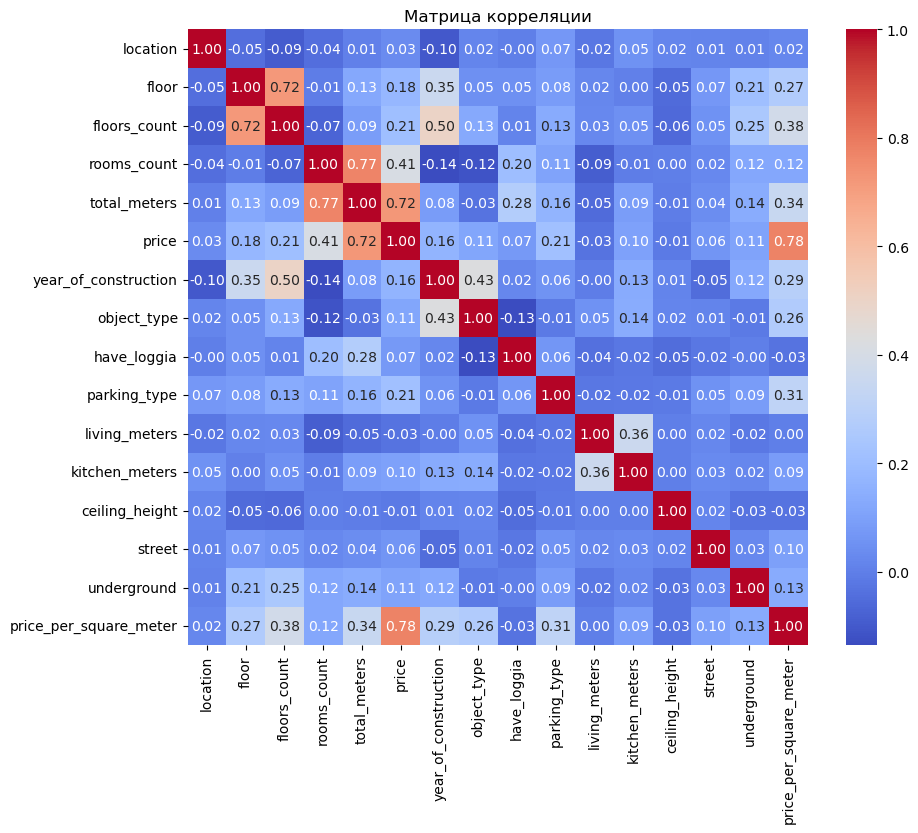

In [99]:
correlation_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

**Анализ матрицы**:
Видим что помимо самой цены за кв. метр, площади и цены, на цену за кв.метр влияют такие столбцы как: кол-во этажей в доме, этаж, год постройки и наличие парковки. 
В меньшей степени влияют: кол-во комнат, улица, площадь кухни и наличие метро.

Теперь, когда мы узнали какие столбцы влияют на цену за кв. метр можно сделать отдельные графики по столбцам:

In [100]:
#добавляю price_per_square_meter' в основной датафрейм (раньше добавлял в копию)
df['price_per_square_meter'] = df['price'] / df['total_meters']
df['price_per_square_meter'] = df['price_per_square_meter']

/tmp/ipykernel_12835/348573446.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x='floors_count', y='price_per_square_meter', palette='mako', estimator=np.mean)


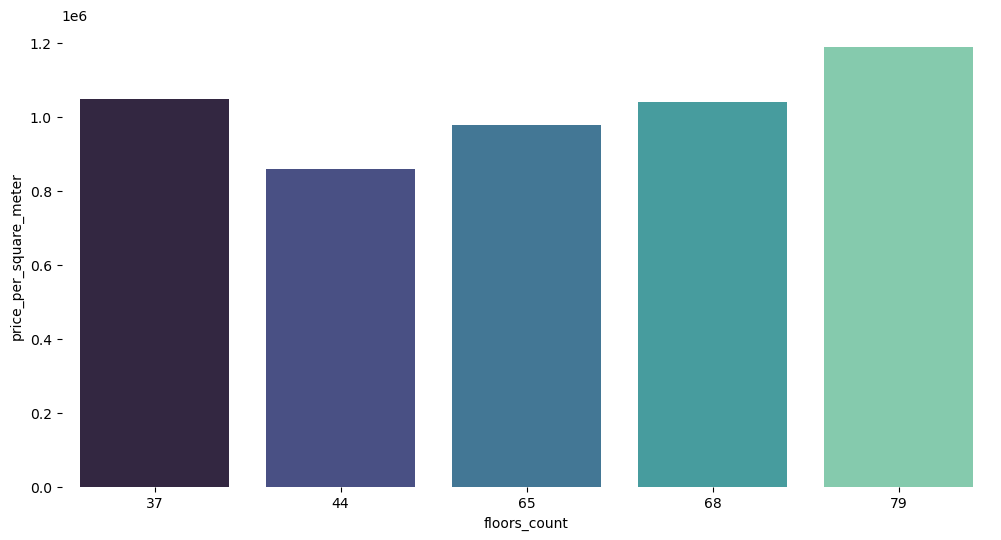

In [101]:
grafiki = df.groupby('floors_count')['price_per_square_meter'].mean().reset_index()
top = grafiki.sort_values(by='price_per_square_meter', ascending=False).head(5)

figsize = (12, 1.2 * len(top))
plt.figure(figsize=figsize)

sns.barplot(data=top, x='floors_count', y='price_per_square_meter', palette='mako', estimator=np.mean)
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipykernel_12835/3375307088.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x='floor', y='price_per_square_meter', palette='mako', estimator=np.mean)


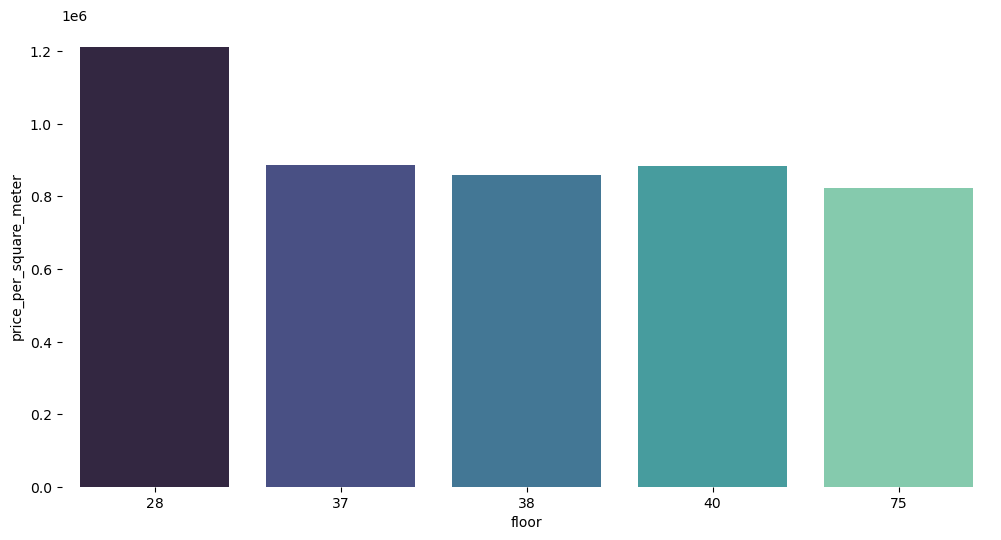

In [102]:
grafiki = df.groupby('floor')['price_per_square_meter'].mean().reset_index()
top = grafiki.sort_values(by='price_per_square_meter', ascending=False).head(5)

figsize = (12, 1.2 * len(top))
plt.figure(figsize=figsize)

sns.barplot(data=top, x='floor', y='price_per_square_meter', palette='mako', estimator=np.mean)
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipykernel_12835/2560856321.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x='year_of_construction', y='price_per_square_meter', palette='mako', estimator=np.mean)


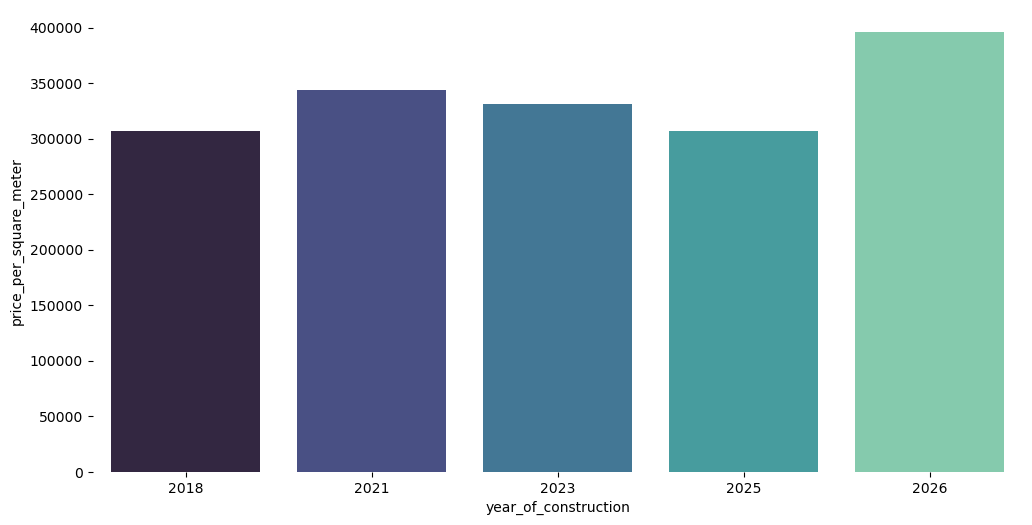

In [103]:
grafiki = df.groupby('year_of_construction')['price_per_square_meter'].mean().reset_index()
top = grafiki.sort_values(by='price_per_square_meter', ascending=False).head(5)

figsize = (12, 1.2 * len(top))
plt.figure(figsize=figsize)

sns.barplot(data=top, x='year_of_construction', y='price_per_square_meter', palette='mako', estimator=np.mean)
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipykernel_12835/98291463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x='parking_type', y='price_per_square_meter', palette='mako', estimator=np.mean)


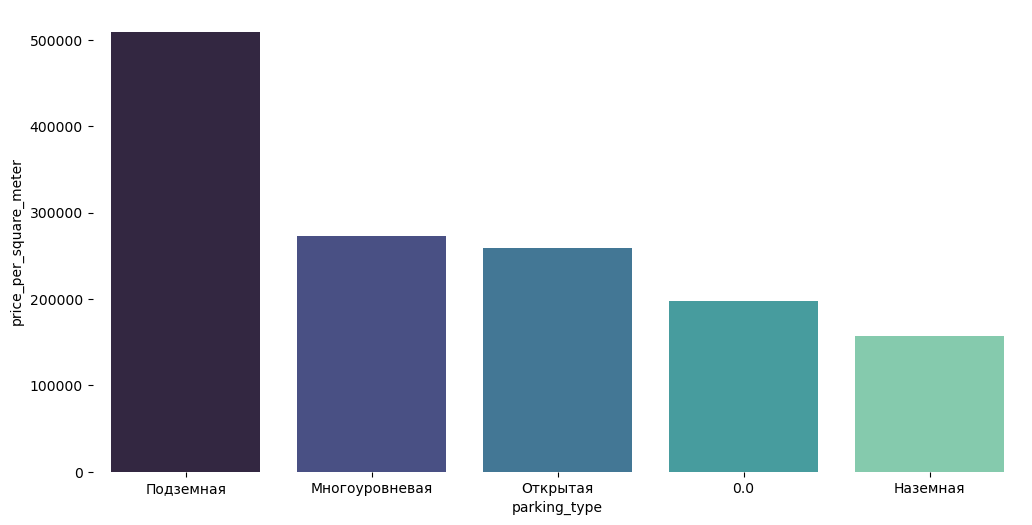

In [104]:
grafiki = df.groupby('parking_type')['price_per_square_meter'].mean().reset_index()
top = grafiki.sort_values(by='price_per_square_meter', ascending=False).head(5)

figsize = (12, 1.2 * len(top))
plt.figure(figsize=figsize)

sns.barplot(data=top, x='parking_type', y='price_per_square_meter', palette='mako', estimator=np.mean)
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipykernel_12835/2815585451.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x='rooms_count', y='price_per_square_meter', palette='mako', estimator=np.mean)


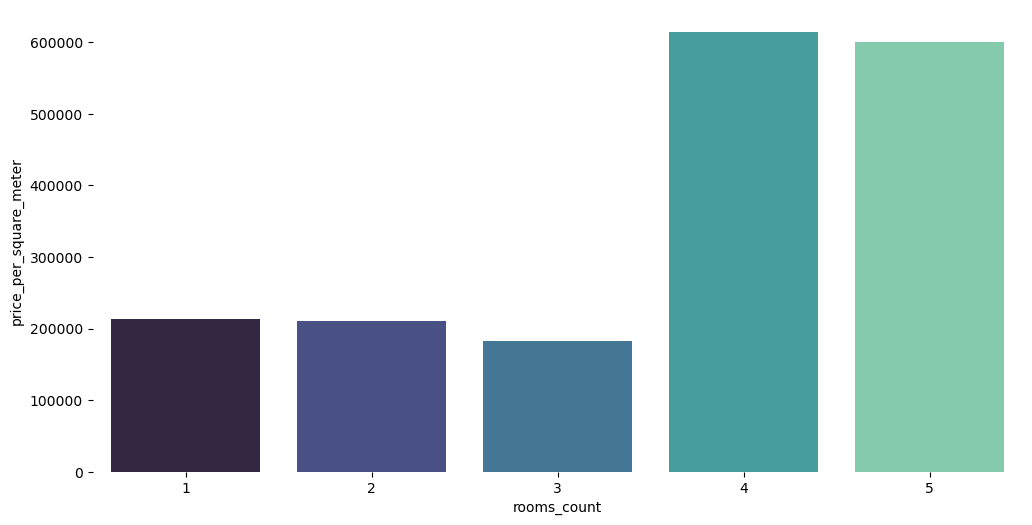

In [105]:
grafiki = df.groupby('rooms_count')['price_per_square_meter'].mean().reset_index()
top = grafiki.sort_values(by='price_per_square_meter', ascending=False).head(5)

figsize = (12, 1.2 * len(top))
plt.figure(figsize=figsize)

sns.barplot(data=top, x='rooms_count', y='price_per_square_meter', palette='mako', estimator=np.mean)
sns.despine(top=True, right=True, bottom=True, left=True)